In [2]:
import matplotlib.pyplot as plt
import glob
import json
import math


In [116]:
input_file_alpha = "models/alpha_zero/config.json"
input_file_reinforce = "models/reinforce/config.json"
input_file_rnd = "rnd_rnd_2.json"

In [130]:
results = {}

for input_file in [input_file_reinforce]:
    results[input_file] = {'raw': []}
    with open(input_file, 'r') as f:
        file_data = json.load(f)
    results[input_file]['raw'].extend(file_data['wins'])
    results[input_file]['raw'] = [list(t.split("-")) if t != "D" else ["D", 0] for t in results[input_file]['raw']]
    results[input_file]['raw'] = [[t[0], 2000 - int(t[1])] for t in results[input_file]['raw']]
    results[input_file]['raw'] = [results[input_file]['raw'][k] for k in range(0, len(results[input_file]['raw']), 21)]

In [137]:
for input_file in [input_file_alpha]:
    results[input_file] = {'raw': []}
    with open(input_file, 'r') as f:
        file_data = json.load(f)

    results[input_file]['raw'].extend(file_data['wins'])
    results[input_file]['raw'] = [list(t.split("-")) if t != "D" else ["D", 0] for t in results[input_file]['raw']]
    results[input_file]['raw'] = [[t[0], int(t[1])] for t in results[input_file]['raw']]
    for r in results[input_file]['raw'][1775:]:
        if r[1] > 0:
            r[1] += 1700
    for r in results[input_file]['raw']:
        r[1] = 2000 - r[1]

In [132]:
for input_file in [input_file_rnd]:
    results[input_file] = {'raw': []}
    with open(input_file, 'r') as f:
        file_data = json.load(f)
    results[input_file]['raw'].extend(file_data['results'])
    results[input_file]['raw'] = [list(t.split("-")) if t != "D" else ["D", 0] for t in results[input_file]['raw']]
    results[input_file]['raw'] = [[t[0], int(t[1])] for t in results[input_file]['raw']]
    for r in results[input_file]['raw']:
        r[1] += 1400
        r[1] = 2000 - r[1]

In [138]:
def avg_window(data, windows_size, key):
    res = []
    for start in range(0, len(data), windows_size):
        w_size = len(data[start:start + windows_size])
        res.append(sum(key(t) for t in data[start:start + windows_size]) / w_size)
    return res

In [139]:
for input_file in [input_file_reinforce,]:
    results[input_file]['episode_length'] = avg_window(results[input_file]['raw'], 20, lambda x: int(x[1]))
    results[input_file]['w_wins'] = avg_window(results[input_file]['raw'], 20, lambda x: x[0] == "W")
    results[input_file]['draws'] = avg_window(results[input_file]['raw'], 20, lambda x: x[0] == "D")

In [140]:
for input_file in [input_file_alpha, input_file_rnd]:
    results[input_file]['episode_length'] = avg_window(results[input_file]['raw'], 20, lambda x: int(x[1]))
    results[input_file]['w_wins'] = avg_window(results[input_file]['raw'], 20, lambda x: x[0] == "W")
    results[input_file]['draws'] = avg_window(results[input_file]['raw'], 20, lambda x: x[0] == "D")

Text(0.5, 1.0, 'episode duration')

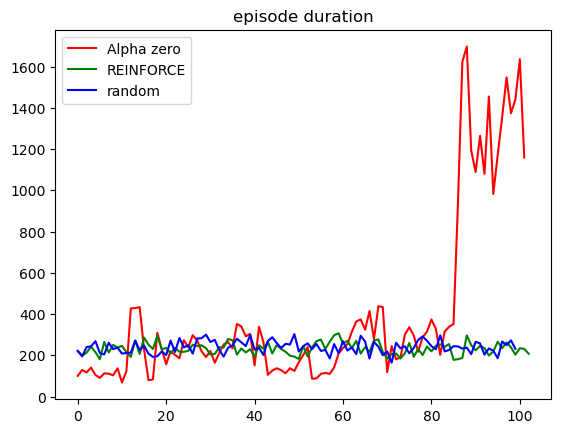

In [141]:
for input_file, color, label in zip([input_file_alpha, input_file_reinforce, input_file_rnd], ['r','g','b'], ['Alpha zero', 'REINFORCE', 'random']):
    plt.plot(results[input_file]['episode_length'], color=color, label=label)
plt.legend()
plt.title("episode duration")

Text(0.5, 1.0, 'victory of whites')

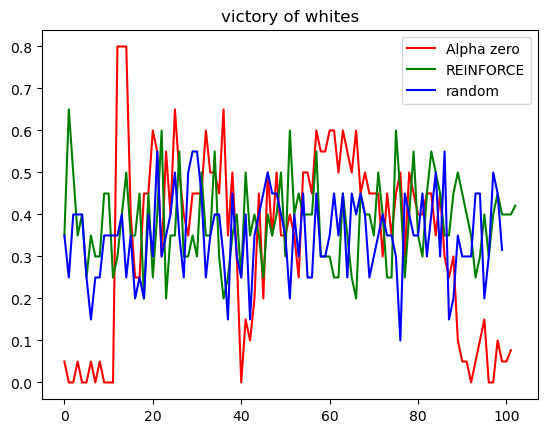

In [124]:
for input_file, color, label in zip([input_file_alpha, input_file_reinforce, input_file_rnd], ['r','g','b'], ['Alpha zero', 'REINFORCE', 'random']):
    plt.plot(results[input_file]['w_wins'], color=color, label=label)
plt.legend()
plt.title("victory of whites")


Text(0.5, 1.0, 'draws')

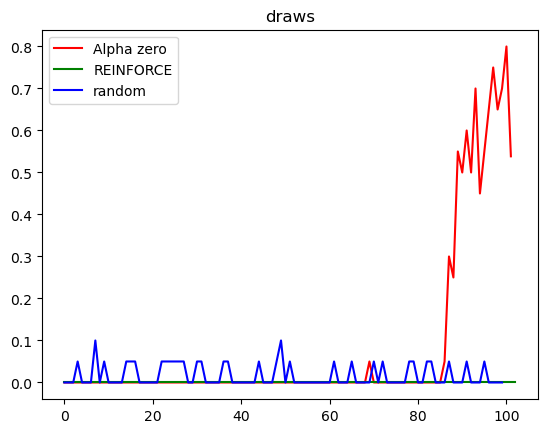

In [125]:
for input_file, color, label in zip([input_file_alpha, input_file_reinforce, input_file_rnd], ['r','g','b'], ['Alpha zero', 'REINFORCE', 'random']):
    plt.plot(results[input_file]['draws'], color=color, label=label)
plt.legend()
plt.title("draws")

In [ ]:
results_training = results

In [142]:
input_categories = ["r_rnd_*", "r_r_*", "r_z_*", "r_zr_*", "zr_r_*"]
# {p1}_{p2}_[file_id].json
# p1 white, p2 black

results = {}
scores = {}

for input_file in input_categories:
    results[input_file] = {'W': 0, "B": 0, "D": 0, "raw": []}
    for file in glob.glob(input_file):
        with open(file, 'r') as f:
            file_lines = f.readlines()
        file_lines = [l.replace("--", "-").replace('"D"', '"D-0"') for l in file_lines]
        file_data = json.loads("".join(file_lines))
        results[input_file]['raw'].extend(file_data['results'])
    

    results[input_file]['raw'] = [tuple(t.split("-")) for t in results[input_file]['raw']]
    results[input_file]['W'] = len([t for t in results[input_file]['raw'] if t[0] == 'W'])
    results[input_file]['B'] = len([t for t in results[input_file]['raw'] if t[0] == 'B'])
    results[input_file]['D'] = len([t for t in results[input_file]['raw'] if t[0] == 'D'])

{'r_rnd_*': [('D', '0'), ('B', '446'), ('B', '466'), ('D', '0'), ('B', '570'), ('D', '0'), ('B', '21'), ('D', '0'), ('D', '0'), ('B', '227'), ('D', '0'), ('B', '287'), ('D', '0'), ('D', '0'), ('B', '24'), ('B', '409'), ('B', '306'), ('D', '0'), ('B', '485'), ('B', '389'), ('B', '206'), ('D', '0'), ('B', '251'), ('D', '0'), ('D', '0'), ('B', '586'), ('D', '0'), ('B', '198'), ('D', '0'), ('B', '82'), ('D', '0'), ('B', '512'), ('B', '479'), ('W', '74'), ('D', '0'), ('D', '0'), ('B', '197'), ('D', '0'), ('D', '0'), ('B', '432'), ('D', '0'), ('D', '0'), ('D', '0'), ('B', '347'), ('D', '0'), ('B', '441'), ('D', '0'), ('D', '0'), ('B', '418'), ('D', '0'), ('D', '0'), ('B', '246'), ('D', '0'), ('D', '0'), ('D', '0'), ('D', '0'), ('D', '0'), ('B', '526'), ('D', '0'), ('D', '0'), ('B', '317'), ('B', '39'), ('B', '393'), ('B', '495'), ('D', '0'), ('B', '471'), ('B', '94'), ('D', '0'), ('D', '0'), ('B', '61'), ('B', '139'), ('D', '0'), ('B', '283'), ('D', '0'), ('D', '0'), ('D', '0'), ('B', '26'),

In [4]:
tournament_size = 50

rnd = 11
r = 39
z = 50

draw = [13,6,20,50,4,6]
w = [11, 39, 50]

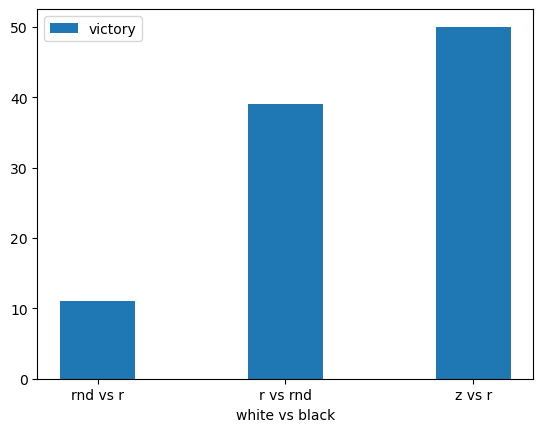

In [10]:
plt.bar([0.5, 1, 1.5], w, 0.2)
plt.xticks([0.5, 1, 1.5], ['rnd vs r', 'r vs rnd', 'z vs r'])
plt.xlabel("white vs black")
plt.legend(["victory"])